# Compare BUSCO and fDOG-Assembly results

In [2]:
!pip install matplotlib_venn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 801.4 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib_venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45388 sha256=7d65d012d0eb6c902c923de793a961bdd792c4530059eecd52dbcd7f4d077f37
  Stored in directory: /home/hannah/.cache/pip/wheels/86/29/d8/0f3c5a37c967a34fb40aaabd414f92104d2ad5fb149c0114a1
Successfully built matplotlib_venn


In [19]:
!pip install upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=upsetplot-0.9.0-py3-none-any.whl size=24866 sha256=84a69620f4708770bc5d71a4fcfb52ffc3ba68e90080f8d5085e16cd99499395
  Stored in directory: /home/hannah/.cache/pip/wheels/d5/0b/03/a5c18ed188619e137e6f170bdb21d745dcf5507cf0d5a2950b
Successfully built upsetplot


In [1]:
import pickle as pkl
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import upsetplot

In [2]:
#read in mapping tables
#busco_augustus_df = pd.read_csv('../overlap_tables/busco_augustus_overlap_gff_files_gallus_v2.tsv', delimiter='\t')
busco_augustus_df = pd.read_csv('../overlap_tables/busco_augustus_species_overlap_gff_files_gallus_v2.tsv', delimiter='\t')
busco_metaeuk_df = pd.read_csv('../overlap_tables/busco_metaeuk_overlap_gff_files_gallus_2.tsv', delimiter='\t')
fa_augustus_df = pd.read_csv('../overlap_tables/fdog_ass_busco_augustus_overlap_gff_files_gallus_v2.tsv', delimiter='\t')
fa_metaeuk_df = pd.read_csv('../overlap_tables/fdog_ass_busco_metaeuk_overlap_gff_files_gallus_v2_sens.tsv', delimiter='\t')
compleasm = pd.read_csv('../overlap_tables/compleasm_overlap_gff_files_gallus_v2.tsv')

In [3]:
def open_pkl(path):
    pkl_file = open(path, 'rb')
    dictionary = pkl.load(pkl_file)
    pkl_file.close()
    return dictionary


In [4]:
#read in mapping busco_uniprot
busco_vs_uniprot = open_pkl('../pkl_files/busco_group_vs_uniprot_ident_90_length_70.pkl')

In [5]:
nemve_entries_busco = busco_augustus_df[busco_augustus_df['Species'] == 45351]
gene_set_busco = set(nemve_entries_busco['GeneID'])

nemve_entries_fa = fa_augustus_df[fa_augustus_df['Species'] == 45351]
gene_set_fa = set(nemve_entries_fa['GeneID'])

In [6]:
diff_busco = gene_set_busco - gene_set_fa
print(len(diff_busco))
#print(diff_busco)

diff_fa = gene_set_fa - gene_set_busco
print(len(diff_fa))

intersection = gene_set_busco.intersection(gene_set_fa)
print(len(intersection))

120
14
791


In [8]:
venn2(subsets = (len(diff_busco), len(diff_fa), len(intersection)), set_labels = ('BUSCO', 'fDOG-Assembly'))
plt.show()

NameError: name 'venn2' is not defined

# Example 455941at33208 species Nemve

Is included in the BUSCO core group: 45351_0:003f71

In fDOG-Assembly canditate regions were found, genes were predicten but no gene was in the end accepted because in the backward search another HUMAN gene was teh best hit and the distance criterion eliminated it in the end.

Inparanoid found the following gene as ortholog: A7S3U3

BUSCO identified the same gene as an ortholog. 







In [9]:
#print(busco_vs_uniprot)
print(busco_vs_uniprot['455941at33208'])
# KeyError, is not included in the 

O14662


In [9]:
# seems to be the augustus gene prediciton model organism, because when I use fly I was able to find the genes

## Comparsion BUSCO vs fDOG-Assembly

In [10]:
gene_set_busco = set(busco_augustus_df['GeneID'])
gene_set_fa = set(fa_augustus_df['GeneID'])
diff_busco = gene_set_busco - gene_set_fa
diff_fa = gene_set_fa - gene_set_busco

intersection = gene_set_busco.intersection(gene_set_fa)

venn2(subsets = (len(diff_busco), len(diff_fa), len(intersection)), set_labels = ('BUSCO', 'fDOG-Assembly'))
plt.show()

NameError: name 'venn2' is not defined

In [11]:
print(diff_busco)

{'366124at33208', '486993at33208', '643883at33208'}


In [7]:
# read in QfO input tables
#read in mapping tables
import pandas as pd
#busco_augustus_df = pd.read_csv('../qfo_input/busco_metazoa_augustus_gallus_v2.tsv', delimiter='\t', header=None)
busco_augustus_df  = pd.read_csv('../qfo_input/busco_metazoa_augustus_species_gallus_v2.tsv', delimiter='\t', header=None)
busco_metaeuk_df = pd.read_csv('../qfo_input/busco_metazoa_metaeuk_gallus_v2.tsv', delimiter='\t', header=None)
fa_augustus_df = pd.read_csv('../qfo_input/fdog_assembly_metazoa_augustus_gallus_v2.tsv', delimiter='\t', header=None)
fa_metaeuk_df = pd.read_csv('../qfo_input/fdog_assembly_metazoa_metaeuk_gallus_v2_sens.tsv', delimiter='\t', header=None)
compleas_df = pd.read_csv('../qfo_input/compleasm_metazoa_gallus_v2.tsv', delimiter='\t', header=None)
print(busco_augustus_df.head())

        0       1
0  Q9Y5B9  Q9N5R9
1  Q09161  O01763
2  O95071  Q65ZA8
3  Q96BP3  Q9U1Q3
4  Q8IYI6  Q95Q35


In [13]:
# Join values of the two columns with an underscore and convert to a set
busco_augustus_set = set(busco_augustus_df.apply(lambda row: '_'.join([str(row[0]), str(row[1])]), axis=1))
busco_metaeuk_set = set(busco_metaeuk_df.apply(lambda row: '_'.join([str(row[0]), str(row[1])]), axis=1))
fa_augustus_set = set(fa_augustus_df.apply(lambda row: '_'.join([str(row[0]), str(row[1])]), axis=1))
fa_metaeuk_set = set(fa_metaeuk_df.apply(lambda row: '_'.join([str(row[0]), str(row[1])]), axis=1))
compleasm_set = set(compleas_df.apply(lambda row: '_'.join([str(row[0]), str(row[1])]), axis=1))

In [14]:
!pip install venny4py

In [16]:
from venny4py.venny4py import *

sets = {
    'BUSCO Augustus': busco_augustus_set,
    'BUSCO MetaEuk': busco_metaeuk_set,
    'fDOG-Assembly Augustus': fa_augustus_set,
    'fDOG-Assembly MetaEuk': fa_metaeuk_set
}

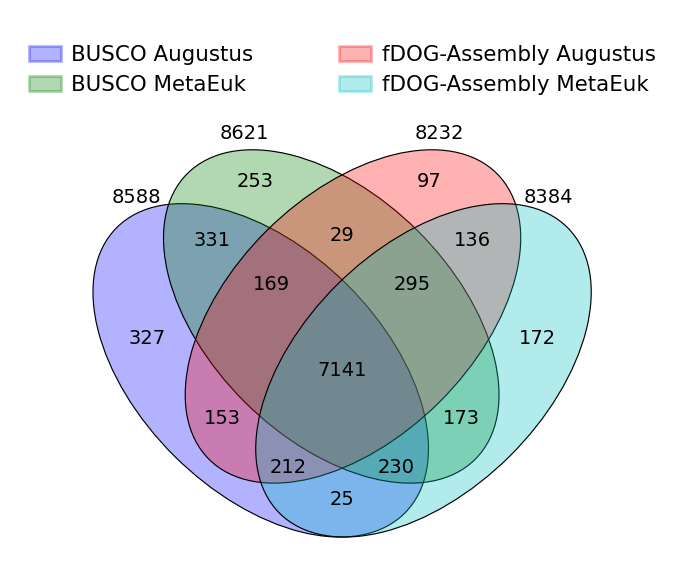

In [17]:
#new results with BUSCO augustus with species parameter
venny4py(sets=sets, ext='svg')

In [14]:
#upset plot
from upsetplot import from_memberships
all_elements = sorted(set.union(busco_augustus_set, busco_metaeuk_set, compleasm_set, fa_augustus_set, fa_metaeuk_set))
memberships = []
for e in all_elements:
    memberships.append(
        tuple(s for s, S in zip(
            ["BUSCO Augustus", "BUSCO MetaEuk","Compleasm", "fDA Augustus", "fDA MetaEuk"],
            [busco_augustus_set, busco_metaeuk_set, compleasm_set, fa_augustus_set, fa_metaeuk_set]
        ) if e in S)
    )

data = from_memberships(memberships)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

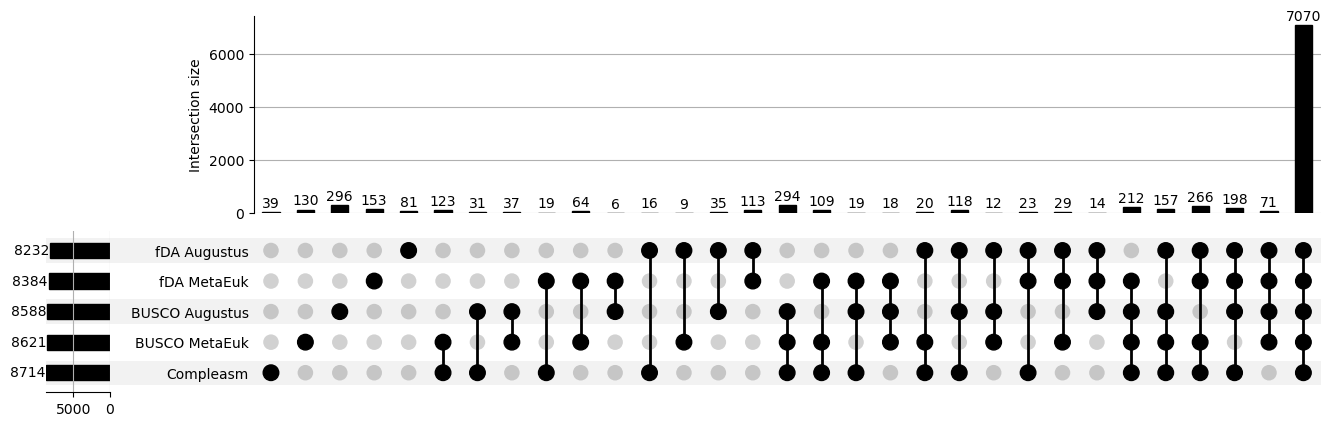

In [15]:
from upsetplot import UpSet
UpSet(data, subset_size="count", show_counts=True).plot()
#plt.savefig("upset_plot.png", dpi=900, bbox_inches="tight")
#plt.close()

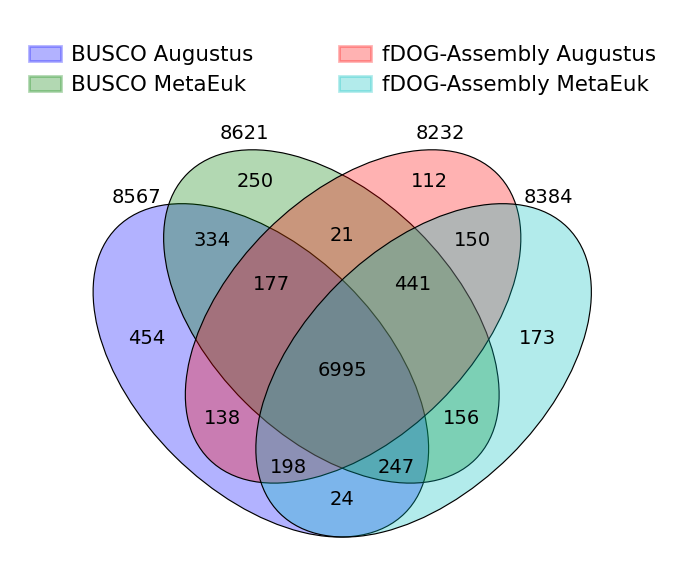

In [19]:
#old results
#venny4py(sets=sets, ext='svg')

In [22]:
inparanoid_df = pd.read_csv('../qfo_input/inparanoid.tsv', delimiter='\t')
inparanoid_set = set(inparanoid_df.apply(lambda row: '_'.join([str(row[0]), str(row[1])]), axis=1))
length_inparanoid = len(inparanoid_set)
inparanoid_set.update(set(inparanoid_df.apply(lambda row: '_'.join([str(row[1]), str(row[0])]), axis=1)))

/tmp/ipykernel_1278092/3251595541.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inparanoid_set = set(inparanoid_df.apply(lambda row: '_'.join([str(row[0]), str(row[1])]), axis=1))
/tmp/ipykernel_1278092/3251595541.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inparanoid_set.update(set(inparanoid_df.apply(lambda row: '_'.join([str(row[1]), str(row[0])]), axis=1)))


In [23]:
print(len(fa_augustus_set.intersection(inparanoid_set)))
print(len(fa_augustus_set))
print(length_inparanoid)

7372
7926
8486


In [24]:
print(len(fa_metaeuk_set.intersection(inparanoid_set)))
print(len(fa_metaeuk_set))
print(length_inparanoid)

7136
7737
8486


In [25]:
print(len(busco_augustus_set.intersection(inparanoid_set)))
print(len(busco_augustus_set))
print(length_inparanoid)

7417
8197
8486


In [26]:
print(len(busco_metaeuk_set.intersection(inparanoid_set)))
print(len(busco_metaeuk_set))
print(length_inparanoid)

7524
8222
8486
